# Decision Tree

## 1create a tree

  ### 1.1calculate the entropy(another methon to measure degree of disorder is Gini impurity)

In [26]:
from math import log
def calculateShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {} # create a dictionary to save the data
    for featureLabel in dataSet:
        currentLabel = featureLabel[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEntropy = 0.0
    for key in labelCounts:
        probability = float(labelCounts[key]) / numEntries
        shannonEntropy -= probability * log(probability, 2)
    return shannonEntropy

In [27]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [28]:
myData, labels = createDataSet()

In [29]:
calculateShannonEnt(myData) # the more entropy has, the mixing degree is higher

0.9709505944546686

In [30]:
# add a new label to view the entropy change
myData[0][-1] = 'maybe' # change the data label for the first data
myData

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [31]:
calculateShannonEnt(myData)

1.3709505944546687

### 1.2separate the data set

In [32]:
def splitDataSet(dataSet, axis, value):
    """
    axis: one of feature in dataSet
    value: the value of the axis(the concrete number in axis)
    """
    subSet = []
    for feature in dataSet:
        if feature[axis] == value:
            reducedFeatureVector = feature[:axis]
            reducedFeatureVector.extend(feature[axis + 1 :])
            subSet.append(reducedFeatureVector)
            """
                a = [1, 2, 3]
                b = [4, 5, 6]
                a.extend(b) out: [1, 2, 3, 4, 5, 6]
                a.append(b) out: [1, 2, 3, [4, 5, 6]]
            """
    return subSet

In [33]:
splitDataSet(myData, 0, 1) # split the dataSet from the 0 columns which value is 1 and reduce this column

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [34]:
myData[0][2] = 'yes'

In [35]:
myData
for examples in myData:
    print(examples)

[1, 1, 'yes']
[1, 1, 'yes']
[1, 0, 'no']
[0, 1, 'no']
[0, 1, 'no']


In [36]:
myData[0]

[1, 1, 'yes']

### 1.3 select the best method to split

In [37]:
def chooseBestFeatureToSplit(dataSet):
    """
    dataSet must a [[] [] []] matrix
    return the best feature to separete (0, 1, ...)
    """
    oldEntropies = calculateShannonEnt(dataSet)
    numFeature = len(dataSet[0]) - 1
    bestInformationGain = 0.0
    bestFeature = -1
    for i in range(numFeature): # Traversing the feature
        featureList = [examples[i] for examples in dataSet] # get the i feature list (example get eveery line example[0] get only a number)
        featureSet = set(featureList) # delete the repeat element using Set
        newEntropies = 0.0

        for value in featureSet: # calculate subset entropy
            reducedDataSet = splitDataSet(dataSet, i, value)
            probability = len(reducedDataSet) / float(len(dataSet))
            #print(probability)
            newEntropies += probability * calculateShannonEnt(reducedDataSet)
            
        informationGain = oldEntropies - newEntropies
       # print(informationGain)
        if(informationGain > bestInformationGain):
            bestInformationGain = informationGain
            bestFeature = i
            
    return bestFeature
        

In [38]:
feature = chooseBestFeatureToSplit(myData)
feature

0

In [39]:
import operator

### 1.4 vote for the most labels

In [40]:
# while feature consume down use vote mathon to decide the label
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key = operator.itemgetter(1), reverse = True) # sort to get the most label
    return sortedClassCount[0][0]

### 1.5 building the tree

In [41]:
def createTree(dataSet, labels):
    """
    labeels: "no surfacing" "flippers"
    """
    classList = [example[-1] for example in dataSet]# get the current dataSet all label
    if classList.count(classList[0]) == len(classList): # if the classList has only one label, the program stop
        return classList[0]
    if len(dataSet[0]) == 1: # if current dataSet consume down all feature, vote to return the most(still leave a label)
        return majorityCnt(classList) # note that what input is a label list
    
    bestFeature = chooseBestFeatureToSplit(dataSet)
    bestFeatureLabel = labels[bestFeature]
    myTree = {bestFeatureLabel: {}} # create a treee
    del(labels[bestFeature])
    featureValue = [examples[bestFeature] for examples in dataSet] # get current feature value
    uniqueValues = set(featureValue) # sane: use set to delete the repeat eleement 
    for value in uniqueValues:
        subLabels = labels[:]
        myTree[bestFeatureLabel][value] = createTree(splitDataSet(dataSet, bestFeature, value), subLabels)
    return myTree
        
    

In [42]:
myData, labels = createDataSet()
labels

['no surfacing', 'flippers']

In [43]:
myTree = createTree(myData, labels)

In [44]:
print(type(myTree.keys()))

<type 'list'>


## 2.use matplotlib draw a decision tree

### 2.1 plot the annotations

In [45]:
import matplotlib.pyplot as plt

In [46]:
# define the text and arrow stylee
decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")
leafNode = dict(boxstyle = "round4", fc = "0.8")
arrow_args = dict(arrowstyle = "<-")

In [49]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot2.ax1.annotate(nodeTxt, xy = parentPt, xycoords = 'axes fraction', xytext = centerPt, textcoords = 'axes fraction',
                           va = "center", ha = "center", bbox = nodeType, arrowprops = arrow_args) # get the axis from the graph
    # while create p1 get the graph1's axis else change
def createPlot():
    fig = plt.figure(1, facecolor = "white")
    fig.clf() # clean the plot place
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotNode('decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

NameError: global name 'createPlot2' is not defined

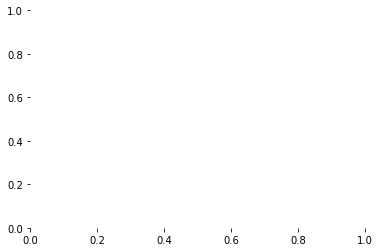

In [50]:
createPlot()

### 2.2 get the number of leaf and deepth

In [51]:
def getNumberLeaf(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumberLeaf(secondDict[key])
        else: 
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

# create a tree information
def retrieveeTree(i):
    listOfTrees = [{'no surfacing': {0 : 'no', 1 : {'flippers': {0 : 'no', 1: 'yes'}}}},
                  {'no surfacing': {0 : 'no', 1 : {'flippers': {0 : {'head': {0 : 'no', 1 : 'yes'}}, 1 : 'no'}}}}
                   ]
    return listOfTrees[i]

In [52]:
retrieveeTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [53]:
myTree = retrieveeTree(0)
getNumberLeaf(myTree)

3

In [54]:
getTreeDepth(myTree)

2

### 2.3 graph the tree

In [55]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot2.ax1.text(xMid, yMid, txtString)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumberLeaf(myTree)
    depth = getTreeDepth(myTree)
    firstStr = myTree.keys()[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD
    
def createPlot2(inTree):
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    axprops = dict(xticks = [], yticks = [])
    createPlot2.ax1 = plt.subplot(111, frameon = False, **axprops)
    plotTree.totalW = float(getNumberLeaf(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

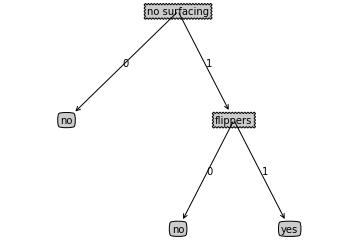

In [56]:

myTree = retrieveeTree(0)
createPlot2(myTree)

## 3 separet function

### 3.1 use model to predict

In [69]:
def classify(inputTree, featLabels, testVec):
    """
    featLabels: the feature name
    testVec: the test Vector
    """
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr) # feature teg list turn the string to index
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [70]:
myData, labels = createDataSet()

In [71]:
labels

['no surfacing', 'flippers']

In [72]:
myTree = retrieveeTree(0)

In [73]:
classify(myTree, labels, [1, 0])

'no'

### 3.2 save the model

In [76]:
def storeTree(inputTree, filename):
    """
    save the model
    """
    import pickle
    fw = open(filename, 'w')
    pickle.dump(inputTree, fw)
    fw.close()

In [77]:
def grabTree(filename):
    """
    load the model
    """
    import pickle
    fr = open(filename)
    return pickle.load(fr)

In [78]:
storeTree(myTree, 'classifierStorage.txt')

In [79]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

# 4 use model to predict the type of glass

In [80]:
fr = open('lenses.txt')

In [81]:
lenses = [inst.strip().split('\t') for inst in fr.readlines()]

In [82]:
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)

In [83]:
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

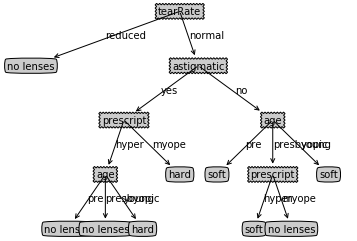

In [85]:
createPlot2(lensesTree)